In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#loading Data

In [ ]:
bike_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/upgrade/linear regression/day (1).csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Finding the information of the Dataset

In [ ]:
bike_data.shape

(730, 16)


*  There are total 730 numbers of data point with 16 numbrs of features



In [ ]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB




*  Dataset have no null values 




In [ ]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

In [ ]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Imputing season column codes with their descriptions

In [ ]:
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Imputing weathersit column codes with their descriptions

In [ ]:
bike_data.weathersit=bike_data.weathersit.map({1:'Clear/Few clouds/Partly cloudy/Partly cloudy',2:'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds',
                                 3:'Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds',
                                 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Imputing weekday column codes with their descriptions

In [ ]:
bike_data.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [ ]:
bike_data[bike_data['weekday']==6].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,331,654,985
7,8,08-01-2018,Spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,6.765000,8.11270,53.5833,17.875868,68,891,959
14,15,15-01-2018,Spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,9.566653,12.40560,49.8750,10.583521,222,1026,1248
21,22,22-01-2018,Spring,0,1,0,6,0,Clear/Few clouds/Partly cloudy/Partly cloudy,2.424346,3.95348,40.0000,11.521990,93,888,981
28,29,29-01-2018,Spring,0,1,0,6,0,Clear/Few clouds/Partly cloudy/Partly cloudy,8.057402,10.60630,65.1739,9.739455,123,975,1098


In [ ]:
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,Monday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Imputing month column codes with their descriptions

In [ ]:
import calendar

bike_data.mnth=bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Imputing yr column codes with their descriptions

In [ ]:
bike_data.yr=bike_data['yr'].map({0: 2018, 1:2019})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,Monday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,Tuesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,Wednesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Feature: cnt

count of total rental bikes including both casual and registered

In [ ]:
bike_data['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

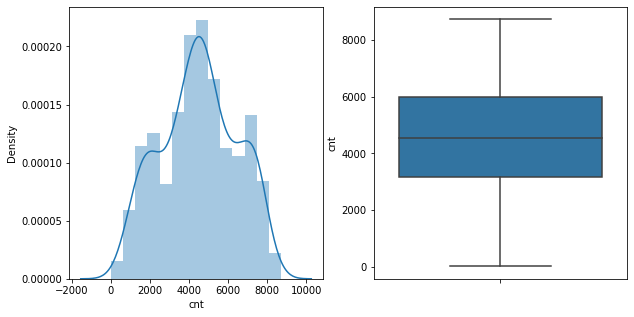

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(bike_data['cnt'], ax=axes[0])


sns.boxplot(y=bike_data['cnt'],ax=axes[1])
plt.show()

# Outlier analysis

In [ ]:
percentile_25= np.percentile(bike_data['cnt'].values ,25)
percentile_75= np.percentile(bike_data['cnt'].values ,75)

IQR=(percentile_75-percentile_25)
lower=percentile_25-(1.5*IQR)
upper=percentile_75+(1.5*IQR)

outleir =bike_data['cnt'][(bike_data['cnt']<lower) | (bike_data['cnt']>upper)]
print(outleir)

Series([], Name: cnt, dtype: int64)


**Observation**

*   From this above analysis we can conclude there is no outleir present in the dataset
 

# Visualizing categorical variables

In [ ]:
def datadisplay(df):
  x= PrettyTable()
  x.field_names = df.columns
  for index, row in df.iterrows():
    x.add_row(row)
  return x

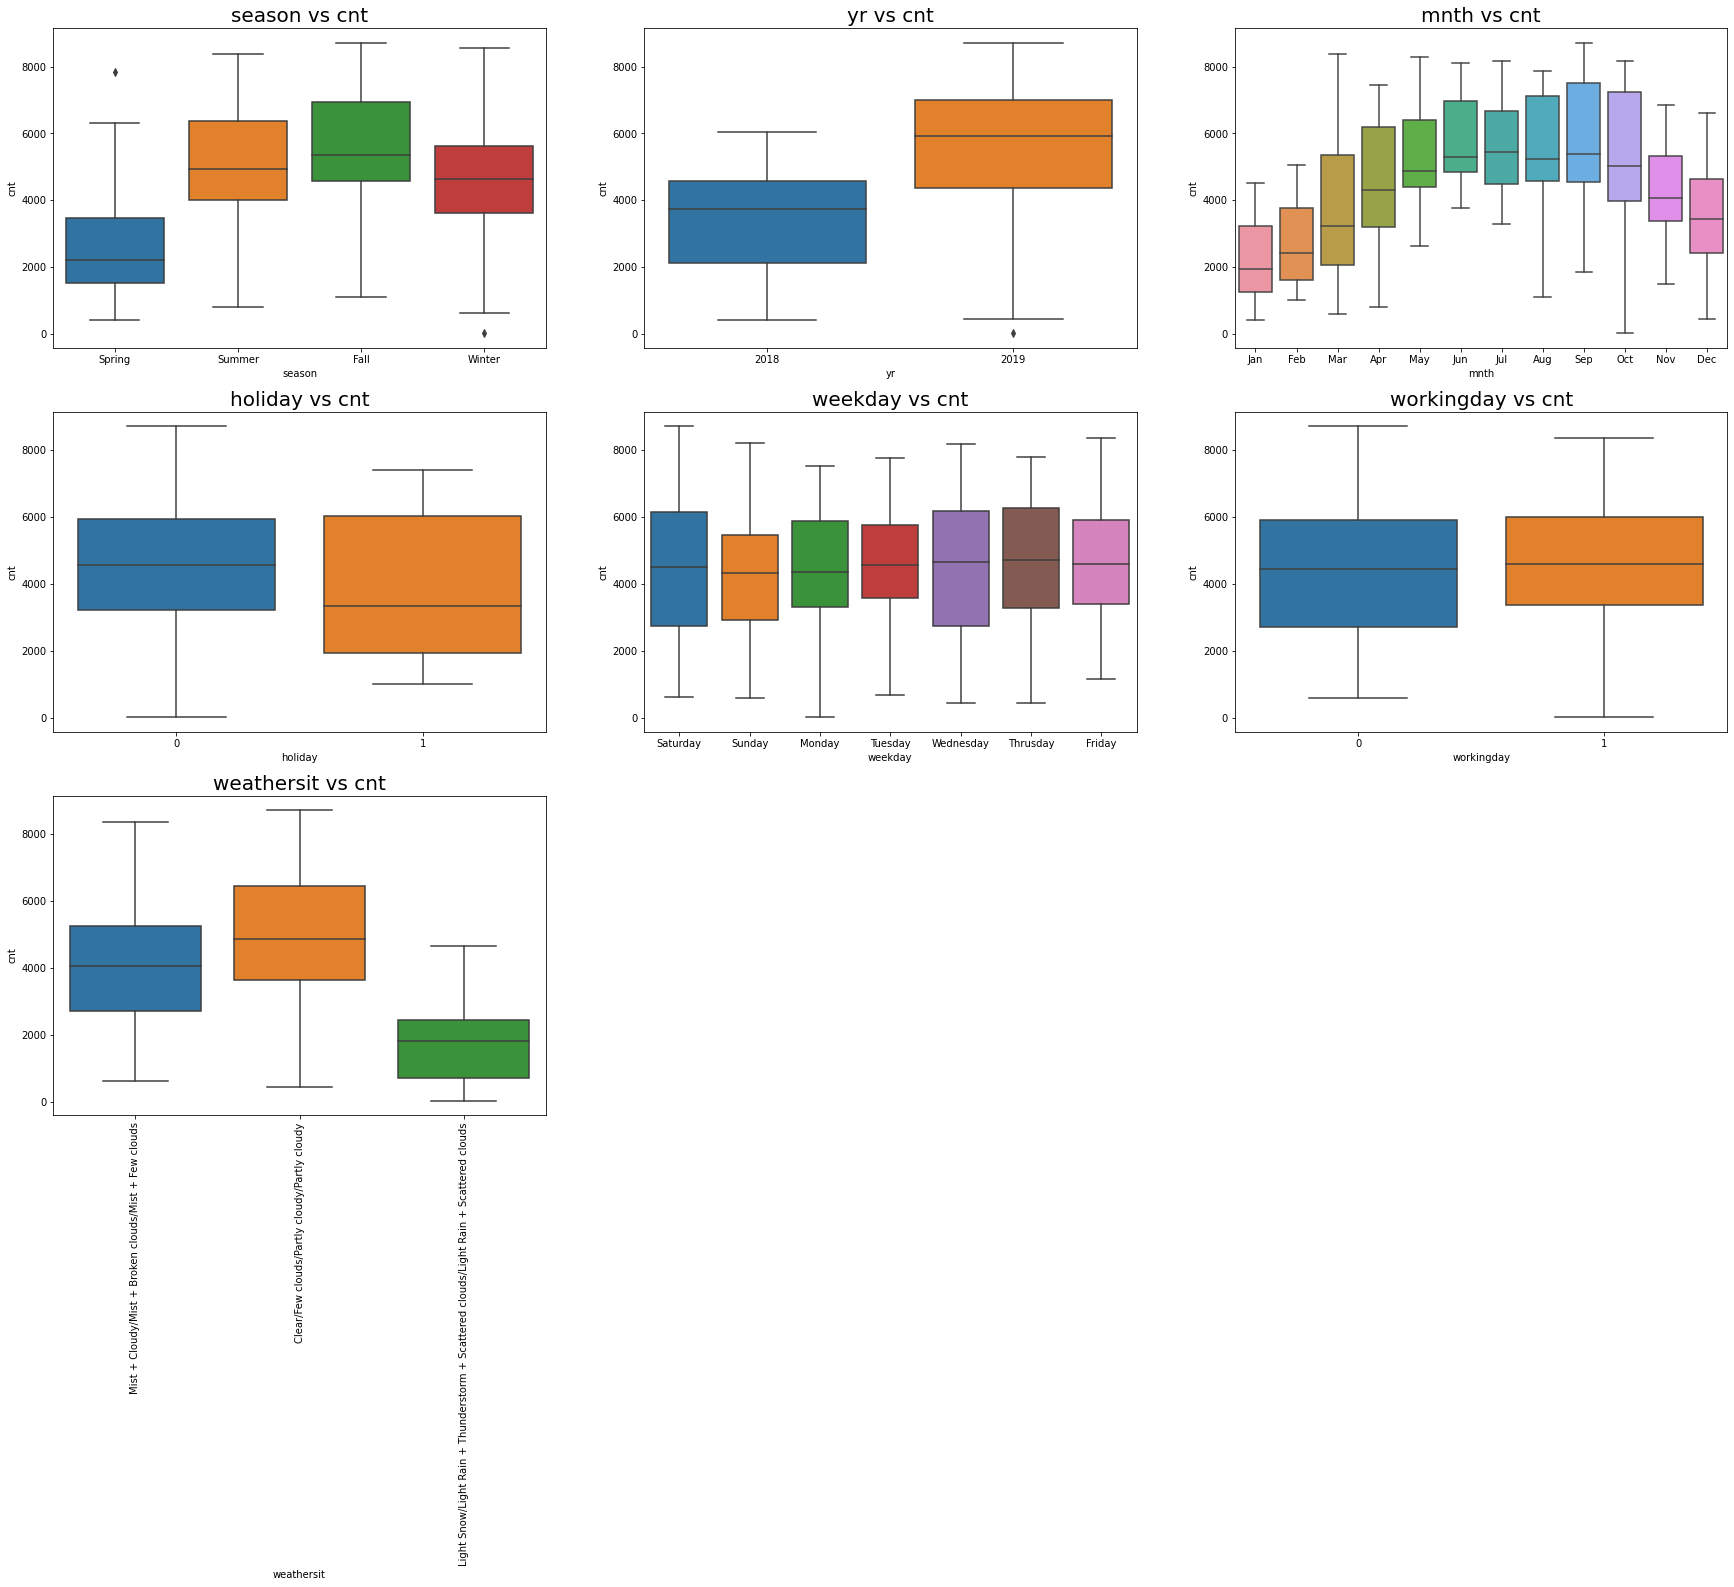

In [ ]:
from seaborn.palettes import color_palette
fig,axes=plt.subplots(3,3,figsize=(30,20))

sns.boxplot(x=bike_data['season'],y=bike_data['cnt'],ax=axes[0,0])
axes[0,0].set_title('season vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['yr'],y=bike_data['cnt'],ax=axes[0,1])
axes[0,1].set_title('yr vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['mnth'],y=bike_data['cnt'],ax=axes[0,2])
axes[0,2].set_title('mnth vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['holiday'],y=bike_data['cnt'],ax=axes[1,0])
axes[1,0].set_title('holiday vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['weekday'],y=bike_data['cnt'],ax=axes[1,1])
axes[1,1].set_title('weekday vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['workingday'],y=bike_data['cnt'],ax=axes[1,2])
axes[1,2].set_title('workingday vs cnt',fontsize = 20)

sns.boxplot(x=bike_data['weathersit'],y=bike_data['cnt'],ax=axes[2,0])
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation=90)
axes[2,0].set_title('weathersit vs cnt',fontsize = 20)
axes[2,1].set_axis_off()
axes[2,2].set_axis_off()

plt.show()

**Observation**

* Season - count of bike sharing is maximum for fall and least for spring 

* Year - count of bike sharing increased in 2019
* Month - count of bike sharing increased in the month of May,June,July,August,September,October with a median of over 4000 bookings per month


* Holiday - Maximum number of bike rentals are happening during non-holiday time
* Weekday - There is no much variance in number of bike sharing throughout the
 Weekdays as it does not show any specific trend here 

* Workingday - count of bike sharing is high for weekdays

* Weathersit-  Clear/Few clouds/Partly cloudy/Partly cloudy weathers show a positive trend in the number of bike users 





#Analysis between 'mnth' and 'cnt' w.r.t Year

+------+--------+--------+
| mnth |  2018  |  2019  |
+------+--------+--------+
| Apr  | 94870  | 174224 |
| Aug  | 136691 | 214503 |
| Dec  | 87323  | 123713 |
| Feb  | 48215  | 101303 |
| Jan  | 38189  | 96744  |
| Jul  | 141341 | 203607 |
| Jun  | 143512 | 202830 |
| Mar  | 64045  | 164875 |
| May  | 135821 | 195865 |
| Nov  | 102167 | 152664 |
| Oct  | 123511 | 198841 |
| Sep  | 127418 | 218573 |
+------+--------+--------+


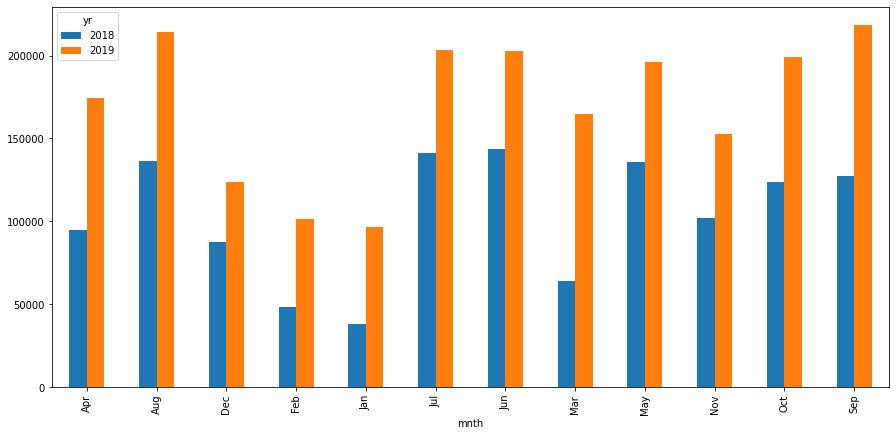

In [ ]:
d=pd.DataFrame(bike_data.groupby(['mnth','yr'])['cnt'].sum().unstack())
d.plot(kind='bar',figsize=(15,7))
d.reset_index(inplace=True)
print(datadisplay(d))

**Observation**

* Maximum number of bike booking has happend in the months May to Oct 
and this trend has been observed for both the years 2018 and 2019.




# Analysis between 'season' and 'cnt' w.r.t Year

+--------+--------+--------+
| season |  2018  |  2019  |
+--------+--------+--------+
|  Fall  | 419650 | 641479 |
| Spring | 150000 | 319514 |
| Summer | 347316 | 571273 |
| Winter | 326137 | 515476 |
+--------+--------+--------+


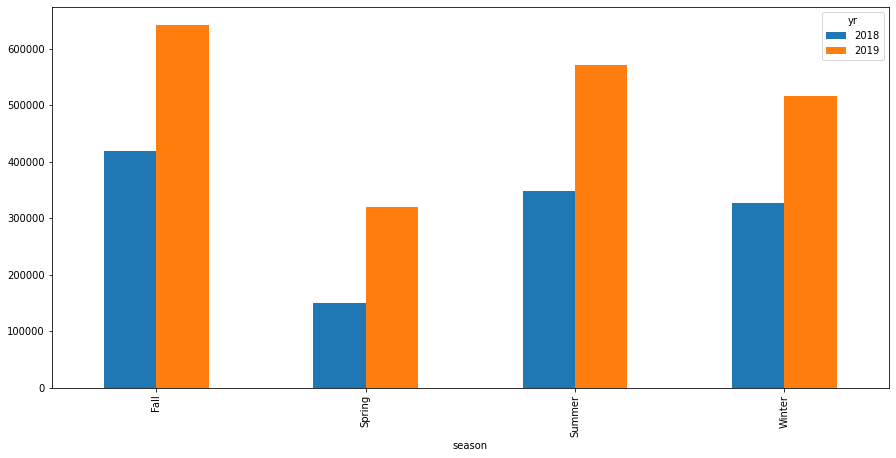

In [ ]:
d=pd.DataFrame(bike_data.groupby(['season','yr'])['cnt'].sum().unstack())
d.plot(kind='bar',figsize=(15,7))
d.reset_index(inplace=True)
print(datadisplay(d))
plt.show()

**Observation**

* Maximum number of bike booking has happend in Fall which is followed by Summer & Winter for both the years.




# Analysis between 'workingday' and 'cnt' w.r.t Year

+------------+--------+---------+
| workingday |  2018  |   2019  |
+------------+--------+---------+
|     0      | 386839 |  613430 |
|     1      | 856264 | 1434312 |
+------------+--------+---------+


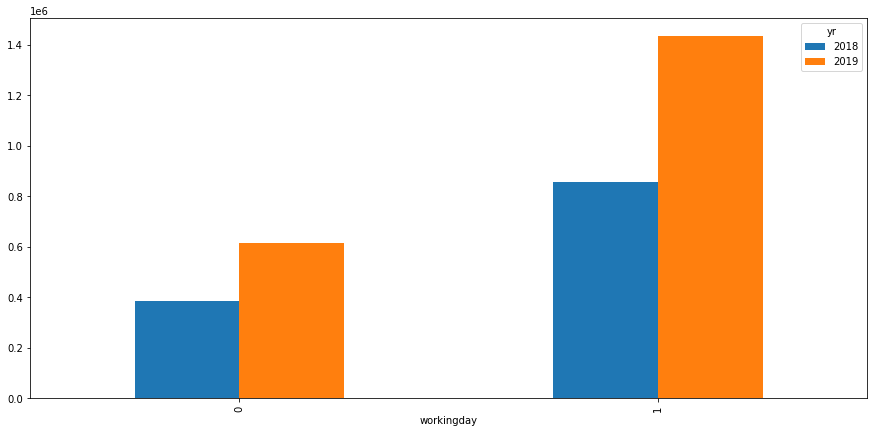

In [ ]:
d=pd.DataFrame(bike_data.groupby(['workingday','yr'])['cnt'].sum().unstack())
d.plot(kind='bar',figsize=(15,7))
d.reset_index(inplace=True)
print(datadisplay(d))
plt.show()

**Observation**

* Maximum number of bike booking has happend during workingday for both the year

# Analysis between 'holiday' and 'cnt' w.r.t Year

+---------+---------+---------+
| holiday |   2018  |   2019  |
+---------+---------+---------+
|    0    | 1213081 | 1999329 |
|    1    |  30022  |  48413  |
+---------+---------+---------+


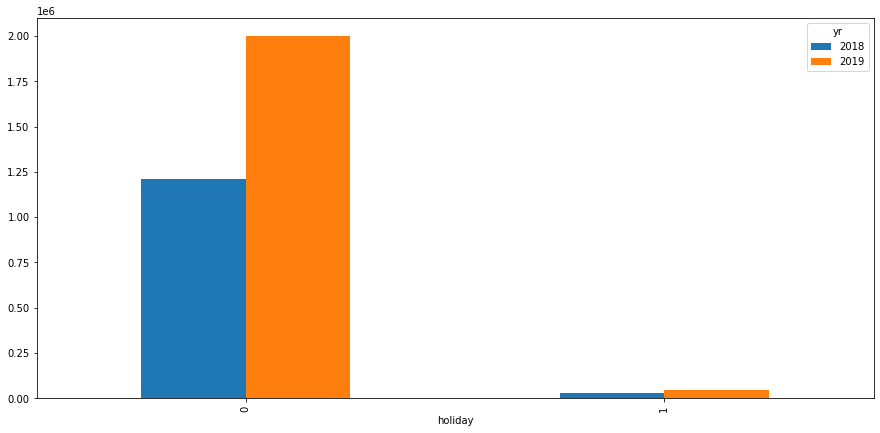

In [ ]:
d=pd.DataFrame(bike_data.groupby(['holiday','yr'])['cnt'].sum().unstack())
d.plot(kind='bar',figsize=(15,7))
d.reset_index(inplace=True)
print(datadisplay(d))
plt.show()

**Observation**

* Maximum number of bike booking has happend during non-holiday time for both the year

# Analysis between 'weekday' and 'cnt' w.r.t Year

+-----------+--------+--------+
|  weekday  |  2018  |  2019  |
+-----------+--------+--------+
|   Friday  | 182006 | 305784 |
|   Monday  | 180221 | 275282 |
|  Saturday | 179743 | 298064 |
|   Sunday  | 177074 | 266953 |
|  Thrusday | 174552 | 310843 |
|  Tuesday  | 180338 | 288771 |
| Wednesday | 169169 | 302045 |
+-----------+--------+--------+


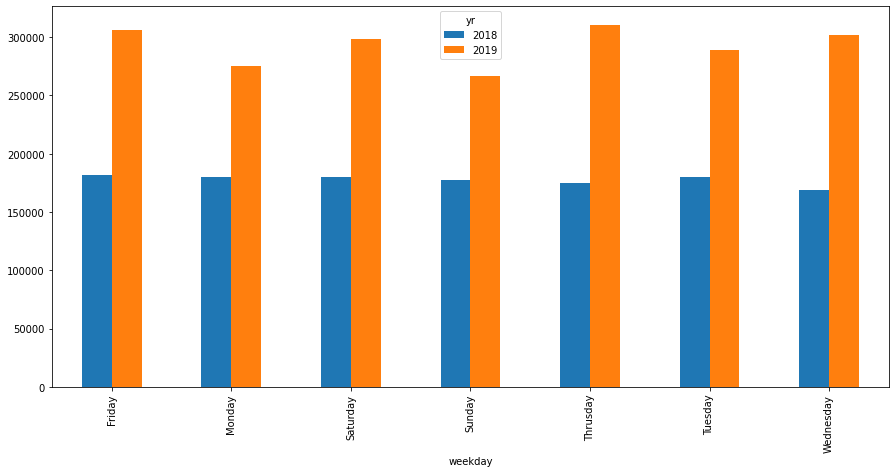

In [ ]:
d=pd.DataFrame(bike_data.groupby(['weekday','yr'])['cnt'].sum().unstack())
d.plot(kind='bar',figsize=(15,7))
d.reset_index(inplace=True)
print(datadisplay(d))
plt.show()

**Observation**

* The number of bike booking has happend almost same throughout the weekdays for both the year so that this feature  have no influence on the predictor

# Visualising Numeric Variables

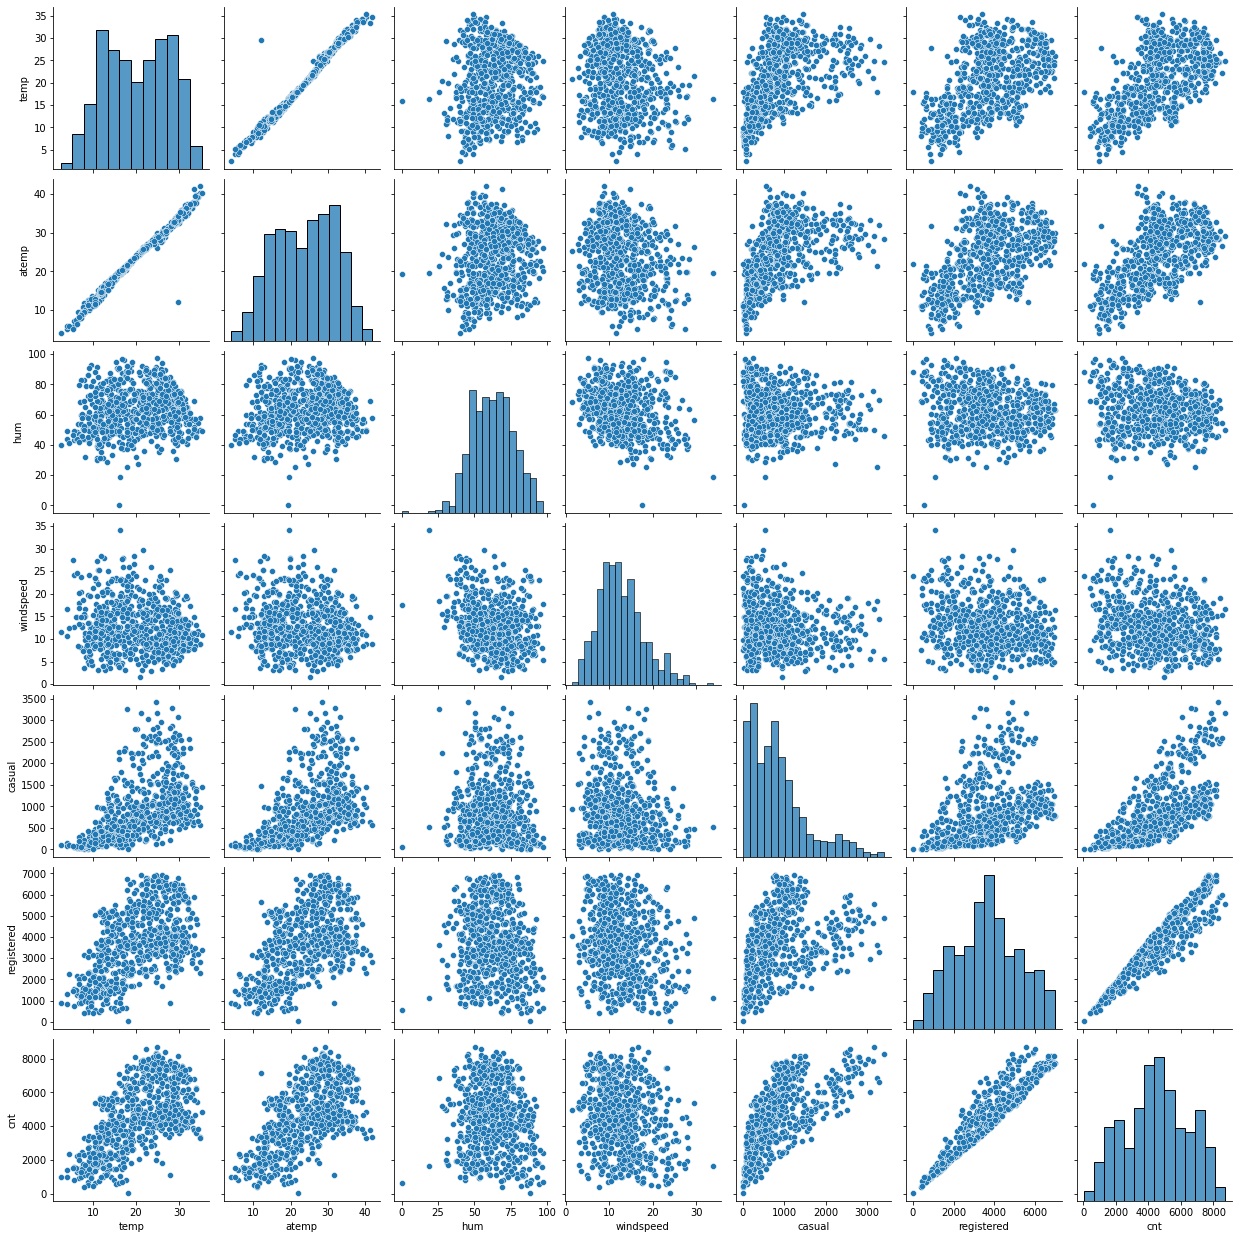

In [ ]:
df=bike_data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
sns.pairplot(df)
plt.show()

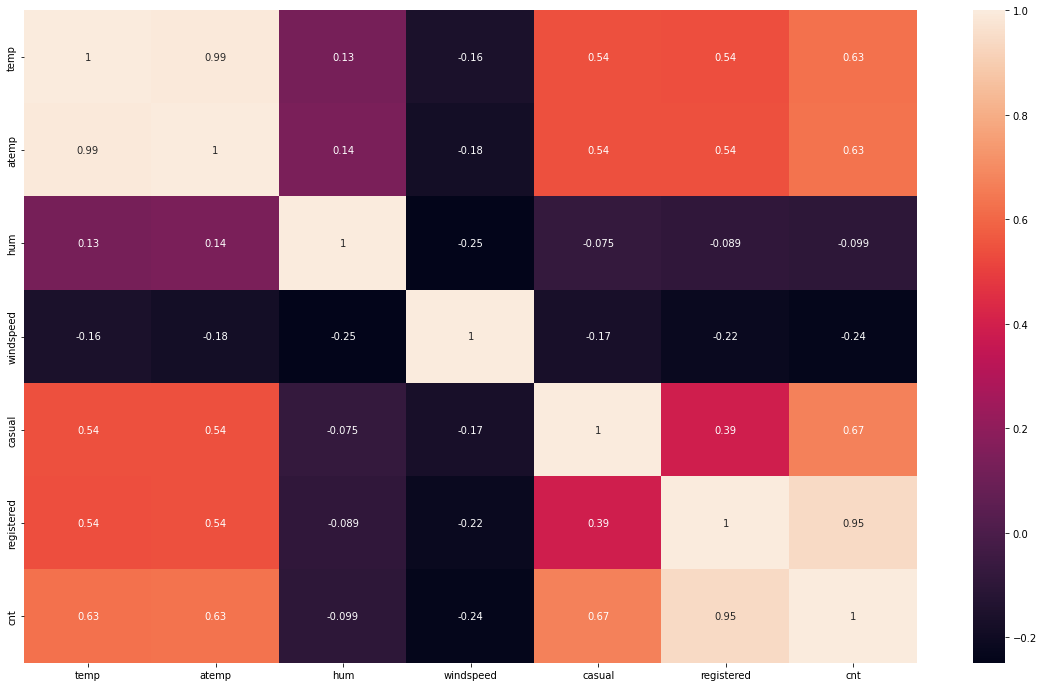

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation**

*  There is a linear relationship between temp and atemp and they are highly correlated.Both of the parameters cannot be used in the model due to multicolinearity




In [ ]:
df=bike_data[['casual','registered','cnt']]
df['casual+registered']=df['casual']+df['registered']
df.head()

,casual,registered,cnt,casual+registered
0,331,654,985,985
1,131,670,801,801
2,120,1229,1349,1349
3,108,1454,1562,1562
4,82,1518,1600,1600


**Observation**



* casual & registered both the columns contains the count of bike booked by different categories of customers. From the above analysis we can conclude that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.






#  Data Preparation

###Dropping the unwanted columns

In [ ]:
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Monday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Tuesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Wednesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variable 

Creating dummy variable for season

In [ ]:
season = pd.get_dummies(bike_data['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Creating dummy variable for month

In [ ]:
month = pd.get_dummies(bike_data['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Creating dummy variable for Weather

In [ ]:
Weather = pd.get_dummies(bike_data['weathersit'], drop_first = True)
Weather.head()

,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Creating dummy variable for weekday

In [ ]:
weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


Merging the Dummy Variables

In [ ]:
bike_data_new = pd.concat([bike_data,season,month,Weather,weekday], axis = 1)
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,Spring,2018,Jan,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,Spring,2018,Jan,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,Spring,2018,Jan,0,Monday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Spring,2018,Jan,0,Tuesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Spring,2018,Jan,0,Wednesday,1,Clear/Few clouds/Partly cloudy/Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
bike_data_new.yr=bike_data_new['yr'].map({2018: 0, 2019:1})


In [ ]:
bike_data_new.shape

(730, 34)

Dropping columns for which dummy variables were created

In [ ]:
bike_data_new.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
bike_data_new.shape

(730, 30)

# Splitting the Data into Train and Test Set

In [ ]:
train,test=train_test_split(bike_data_new,train_size = 0.7, test_size = 0.3, random_state = 100)
print(train.shape,test.shape)

(510, 30) (219, 30)


# Rescaling the Features

In [ ]:
scaler=MinMaxScaler()

num_var=['cnt','hum','windspeed','temp','atemp']
scaler.fit(train[num_var])

train[num_var]=scaler.transform(train[num_var])


In [ ]:
train[num_var].describe()

,cnt,hum,windspeed,temp,atemp
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.650369,0.320768,0.537262,0.512989
std,0.224593,0.145882,0.169797,0.225844,0.212385
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.538643,0.199179,0.339853,0.332086
50%,0.518638,0.653714,0.296763,0.540519,0.526811
75%,0.684710,0.754830,0.414447,0.735215,0.688457
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


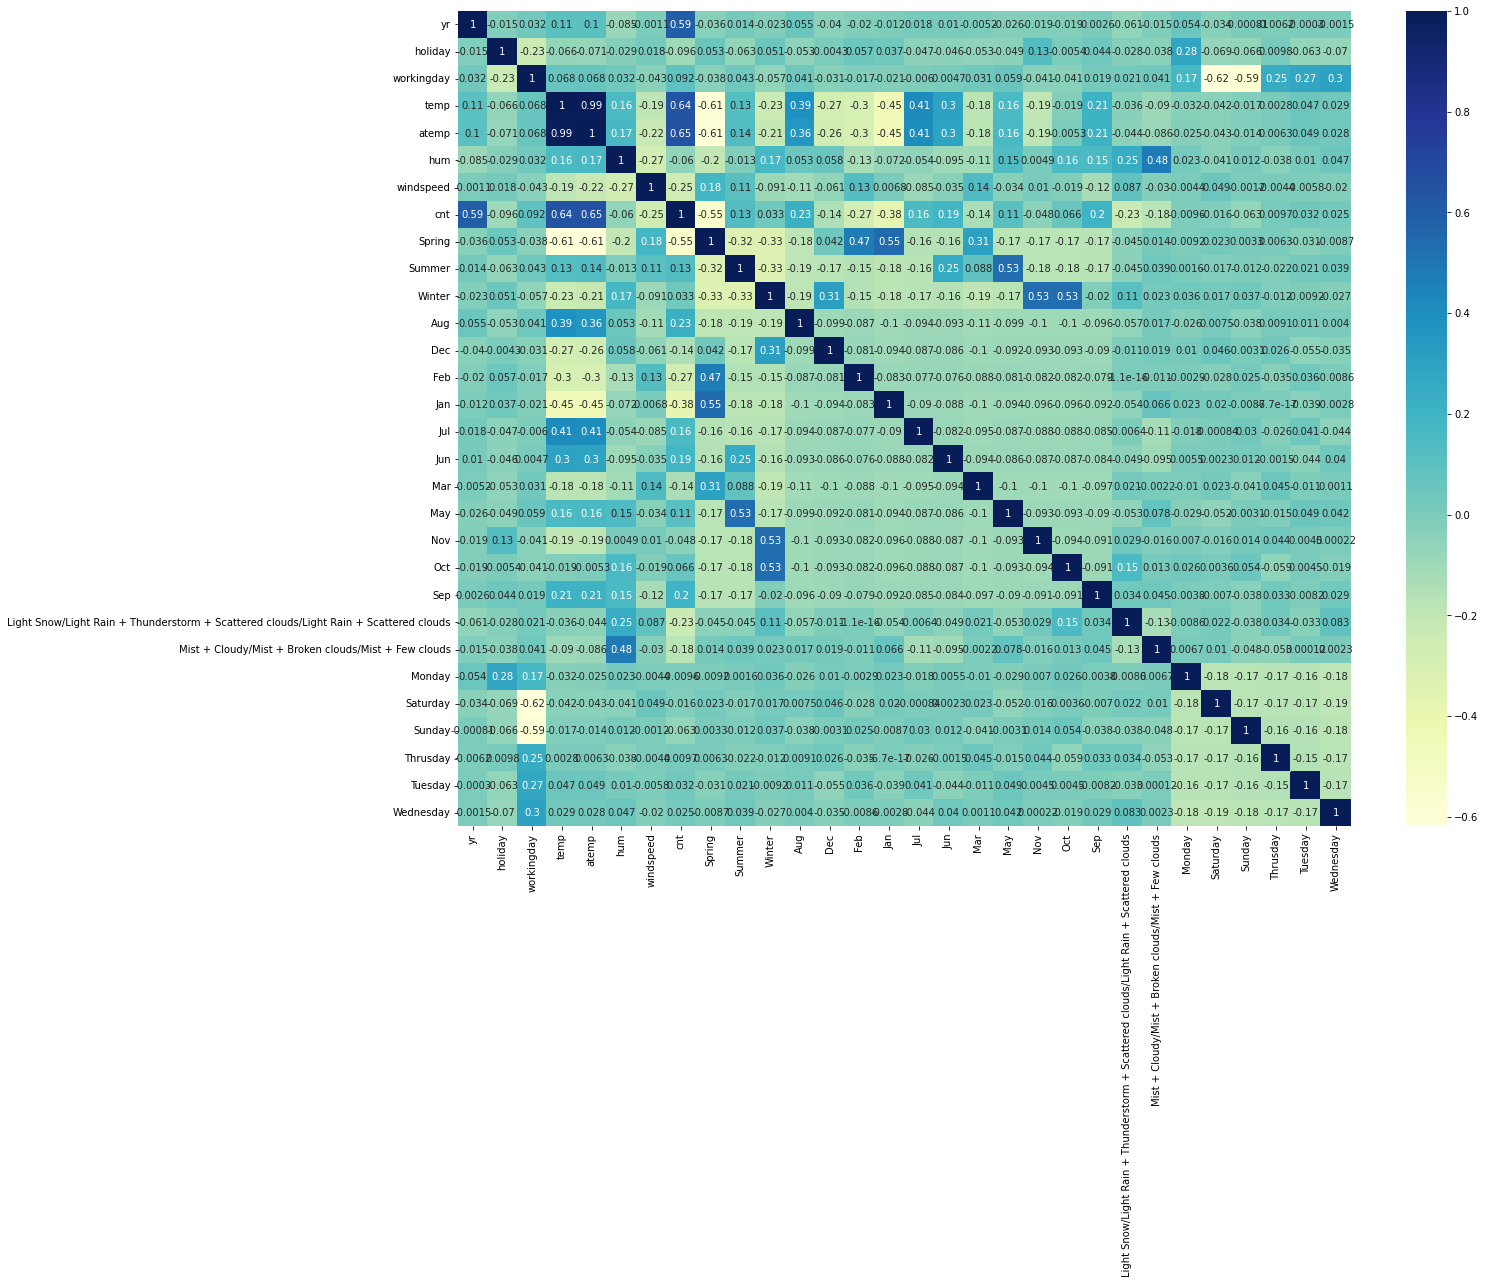

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.show()




*  We can see that temperature,Summer season,June to october months and year are in good correlation with the 'count' variable


*   workingday variable has high negative correlation with Sat & Sun


*   Spring and winter month like Dec,Jan,Feb,March are negatively correlated with cnt









# Dividing the dataset into independent variable and tergat variable 

In [ ]:
y_train = train.pop('cnt')
X_train = train


In [ ]:
print(X_train.shape,y_train.shape)

(510, 29) (510,)


# Model 1

Build the model with all the features

Adding Constant

In [ ]:
X_train_sm= sm.add_constant(X_train)

Create a first model

In [ ]:
lr1=sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr1.params

const                                                                                    0.245237
yr                                                                                       0.232208
holiday                                                                                  0.010689
workingday                                                                               0.096962
temp                                                                                     0.401322
atemp                                                                                    0.050628
hum                                                                                     -0.151812
windspeed                                                                               -0.184388
Spring                                                                                  -0.048580
Summer                                                                                   0.038216
Winter              

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.42e-181
Time:                        12:16:12   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
24,Saturday,19.72
25,Sunday,18.35
7,Spring,10.80
9,Winter,9.52
8,Summer,8.31
18,Nov,6.80
19,Oct,6.59


**Observation**



*   The value of  F-statistic is high andthe value of Prob (F-statistic) is very low near to zero,so we can conclude that the model is significant.

*  The value of  R-squared is 0.853 and Adjusted R-squared is 0.845 which are high .From the R-squared value we can conclude 85% of the variance in the data is being explained by the model.



*   There are many features whise p-value is more than the significant level which is greater than 0.05.So that we can say the variable is insignificant in the prediction of the target variable.



*   From VIF Analysis , we can see there are many features which are having vif values more than 5 so it is indicating that there must be multicollinearity between the features.










# Residual Analysis and Predictions on Training Dataset

In [ ]:
y_train_pred=lr1.predict(X_train_sm)
y_train_pred.head()

653    0.755371
576    0.722799
426    0.520677
728    0.335445
482    0.617968
dtype: float64

In [ ]:
res= y_train - y_train_pred
res.head()

653    0.108872
576    0.104858
426   -0.055421
728   -0.131349
482   -0.134995
dtype: float64

# Error Distribution

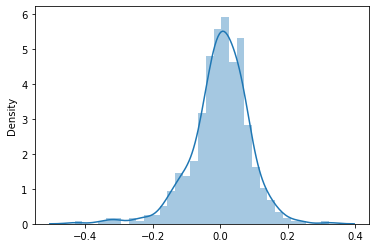

In [ ]:
sns.distplot(res)
plt.show()

In [ ]:
y_train_pred[0:10]

653    0.755371
576    0.722799
426    0.520677
728    0.335445
482    0.617968
111    0.289927
580    0.820165
500    0.813761
479    0.744422
472    0.634274
dtype: float64

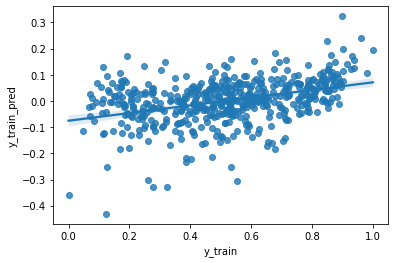

In [ ]:
sns.regplot(y_train,res)             
plt.xlabel('y_train')                       
plt.ylabel('y_train_pred')  

plt.show()

**Observation**

* The residuals terms are normally distributed and have a mean value of zero



*   There is a linear relationship between y_train and y_train_pred 



*  Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can see that there is not any pattern in the error terms








# Model 2

Building the model using RFE selected features.

Creating a RFE object

In [ ]:
lr_rfe=LinearRegression()
lr_rfe.fit(X_train,y_train)

rfe = RFE(lr_rfe,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

Columns selected by RFE and their weights

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thrusday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11)]

Columns selected by RFE

In [ ]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jul', 'Sep',
       'Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds',
       'Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds', 'Saturday',
       'Sunday'],
      dtype='object')

Columns not selected by RFE

In [ ]:
col_not=X_train.columns[~rfe.support_]
col_not

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

Creating X_train dataframe with RFE selected variable

In [ ]:
X_train_rfe = X_train[col]

Adding a constant variable

In [ ]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

Fitting to model

In [ ]:
lr2 = sm.OLS(y_train,X_train_rfe_sm).fit()

In [ ]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.13e-191
Time:                        12:16:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
13,Saturday,12.20
14,Sunday,11.79
6,Spring,5.02
3,temp,3.62
8,Winter,3.49
1,holiday,2.91
7,Summer,2.61
4,hum,1.91
12,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.57


**Observation**


*   From the above analysis we can see workingday has high VIF value but low p_value whereas holiday has low VIF value but high p_valueand .So we can choose holiday to drop from the dataset




In [ ]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Model 3

Building the model using new features after dropping holiday

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new)

Fitting to model

In [ ]:
lr3 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.13e-191
Time:                        12:16:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
12,Saturday,4.91
4,windspeed,4.90
5,Spring,4.80
13,Sunday,4.76
7,Winter,3.71
6,Summer,3.03
11,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,2.31


**Observation**


*   From the above analysis we can see hum has high VIF value so we can drop the feature




In [ ]:
X_train_new1 = X_train_new.drop(['hum'], axis = 1)

# Model 4

Building the model using new features after dropping hum

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new1)

Fitting to model

In [ ]:
lr4 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.73e-189
Time:                        12:16:13   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
11,Saturday,4.45
12,Sunday,4.21
4,Spring,3.82
6,Winter,2.80
5,Summer,2.75
0,yr,2.07
7,Jul,1.60


**Observation**


*   From the above analysis we can see workingday has high VIF value so we can drop the feature




In [ ]:
X_train_new2 = X_train_new1.drop(['workingday'], axis = 1)

# Model 5
Building the model using new features after dropping workingday

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new2)

Fitting to model

In [ ]:
lr5 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.01e-186
Time:                        12:16:14   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,Summer,2.23
3,Spring,2.11
0,yr,2.07
5,Winter,1.82
6,Jul,1.59
9,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.55
7,Sep,1.33
10,Saturday,1.22


**Observation**


*   From the above analysis we can see temp has high VIF value but low p_value whereas Saturday has low VIF value but high p_value .So we can choose Saturday to drop from the dataset




In [ ]:
X_train_new3 = X_train_new2.drop(['Saturday'], axis = 1)

# Model 6
Building the model using new features after dropping Saturday

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new3)

Fitting to model

In [ ]:
lr6 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.65e-187
Time:                        12:16:14   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,Summer,2.22
3,Spring,2.09
0,yr,2.07
5,Winter,1.80
6,Jul,1.59
9,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.55
7,Sep,1.33
10,Sunday,1.17


**Observation**


*   From the above analysis we can see temp has high VIF value.So we can choose Saturday to drop from the dataset




In [ ]:
X_train_new4 = X_train_new3.drop(['temp'], axis = 1)

# Model 7
Building the model using new features after dropping temp

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new4)

Fitting to model

In [ ]:
lr7 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.10e-149
Time:                        12:16:14   Log-Likelihood:                 406.26
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.82
2,Spring,2.08
3,Summer,2.02
0,yr,1.83
4,Winter,1.76
8,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.51
5,Jul,1.21
9,Sunday,1.16
6,Sep,1.15
7,Light Snow/Light Rain + Thunderstorm + Scatter...,1.08


**Observation**


* In cae of model 6 , we have conclude temp has high VIF but if we drop temp from dataset,there is a huge drop on R-square and adjusted R-squared which we can see in Model 7. So this is not a good model.Thats why we have decided to not to remove temp from the dataset.



*   But there must have bee multicolinearity between the features that's why the VIF value of temp is comming high. So we need to check the colinearity between the features







# Checking Colinearity between the features

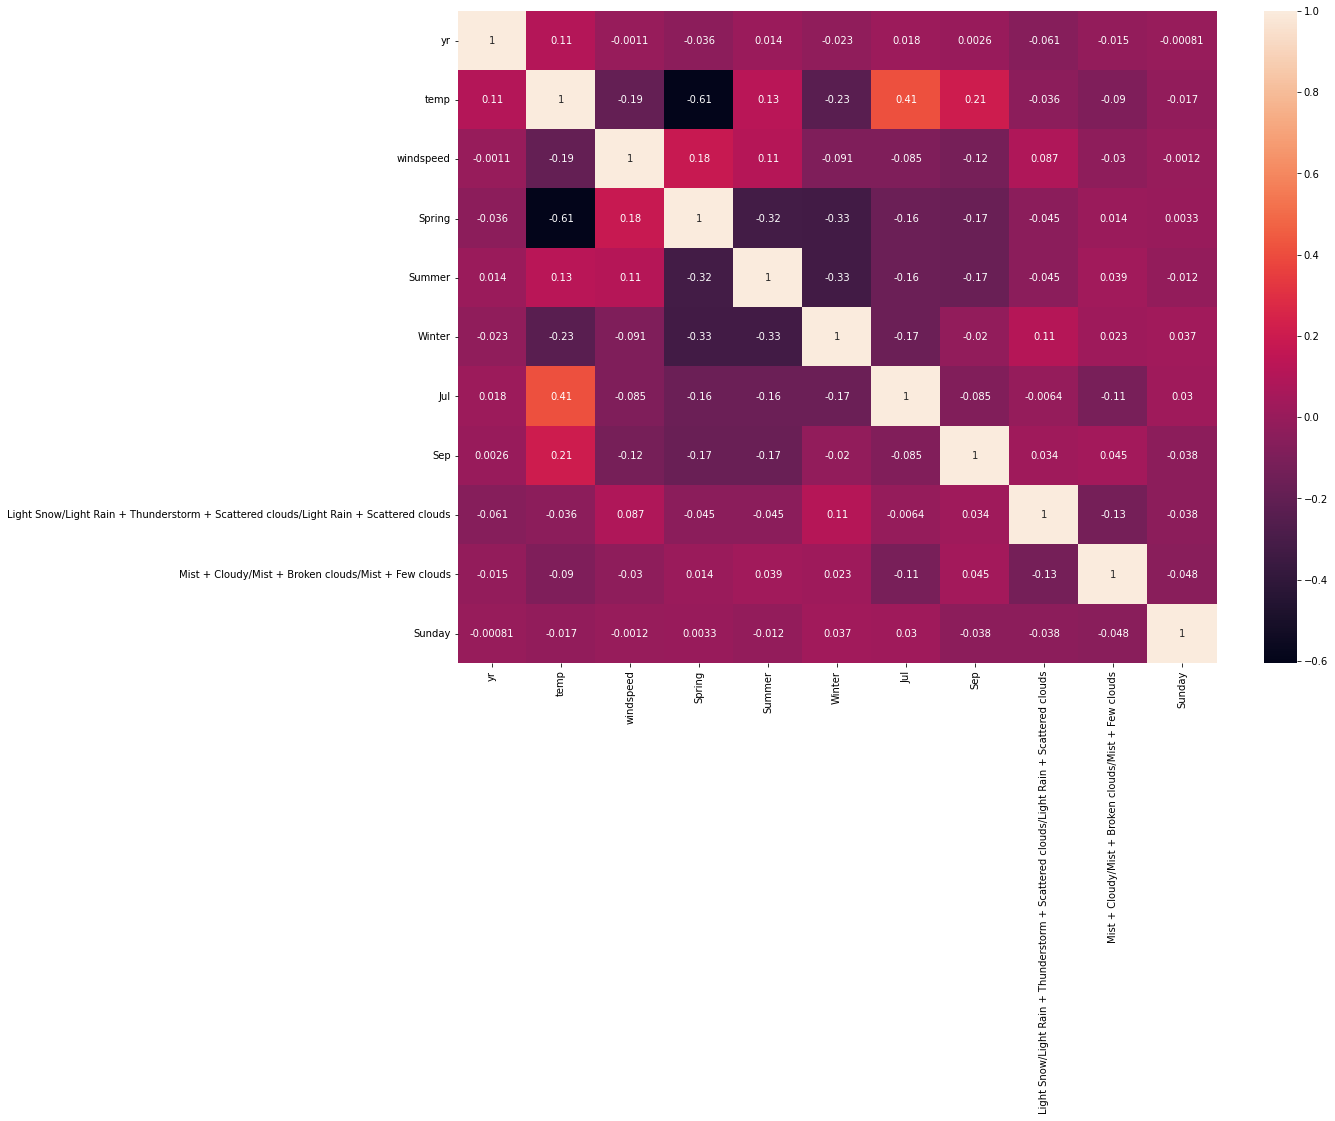

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(X_train_new3.corr(),annot=True)
plt.show()

**Observation**



*   We can see there is a colinearity between Jul and temp,so we c an drop any of them and check the model.
*   As we see in previous model, if we drop temp,the  R-squared value and Adj. R-squared value also reduced. So that we can check the model dropping Jul .



In [ ]:
X_train_new5 = X_train_new3.drop(['Jul'], axis = 1)

# Model 8
Building the model using new features after dropping hum

Adding a constant variable

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new5)

Fitting to model

In [ ]:
lr8 = sm.OLS(y_train,X_train_new_sm).fit()

In [ ]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.93e-187
Time:                        12:16:15   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Calculating VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,Spring,2.00
4,Summer,1.90
5,Winter,1.64
8,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.54
6,Sep,1.22
9,Sunday,1.17
7,Light Snow/Light Rain + Thunderstorm + Scatter...,1.08


**Observation**


* Here we can see  the R-squared value and Adj. R-squared value are not effected if we drop Jul. So we can consider Model 8 as Final model.



# Final Model Evaluation

# F-Staitsics :

In [ ]:
print('{}: F-statistic,  {}:Prob(F) '.format(lr8.fvalue,lr8.f_pvalue))

250.31599686701665: F-statistic,  2.933067657535363e-187:Prob(F) 


**Observation**

* The value of the F-statistic is high, and the value of Prob(F) is low hence, we can conclude that the model is significant. 






# R-squared and Adjusted R-squared 

In [ ]:
print('{}: R-squared,  {}:Adjusted R-squared '.format(round(lr8.rsquared,3),round(lr8.rsquared_adj,3)))

0.834: R-squared,  0.83:Adjusted R-squared 


**Observation**



*  The value of  R-squared is 0.834 so we can explain that 83% of the variance in the data is being explained by the model . A



*   Adjusted R-squared is 0.830 which is very closed to R-squared so we can conclude all the features used in the model are significant .



# Hypothesis Testing :




*   Null Hypothesis (H0): β1,β2,β3,β4,β5,β6,β7,β8,β9,β10=0
*   Alternate Hypothesis (HA): β1,β2,β3,β4,β5,β6,β7,β8,β9,β10≠0




In [ ]:
lr8.params

const                                                                                    0.195762
yr                                                                                       0.234324
temp                                                                                     0.479893
windspeed                                                                               -0.149907
Spring                                                                                  -0.056954
Summer                                                                                   0.061288
Winter                                                                                   0.095113
Sep                                                                                      0.085344
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds   -0.286518
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds                                    -0.080314
Sunday              

**Observation**



*   Freom the above model we can see,All the coefficients are not zero so that we can reject the null hypothesis.
*  And also the p-value of all the featire is less than 0.05, so that we can reject the null hypothesis and state that the coefficient of all the features are  significant.



# Interpretation of coefficients



*   const : The Constant value of 0.1958 indicated that, in the absence of all other predictor variables, The bike rental can still increase by 0.1958 units.

*   yr : A coefficient value of 0.234324 indicated that a unit increase in yr variable, increases the bike hire numbers by 0.234324 units

*   temp : A coefficient value of 0.479893 indicated that a unit increase in temp variable, increases the bike hire numbers by 0.479893 units

*   windspeed : A coefficient value of -0.149907 indicated that a unit increase in windspeed variable, decreases the bike hire numbers by -0.149907 units

*   Spring : A coefficient value of -0.056954 indicated that a unit increase in Spring variable, decreases the bike hire numbers by -0.056954 units

*   Summer : A coefficient value of 0.061288 indicated that a unit increase in Summer variable, increases the bike hire numbers by 0.061288 units

*   Winter : A coefficient value of 0.095113 indicated that a unit increase in Winter variable, increases the bike hire numbers by 0.095113 units

*   Sep : A coefficient value of 0.085344 indicated that a unit increase in Sep variable, increases the bike hire numbers by 0.085344 units

*   Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds : A coefficient value of -0.286518 indicated that a unit increase in Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds variable, decreases the bike hire numbers by -0.286518 units

*   Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds : A coefficient value of -0.080314 indicated that a unit increase in Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds variable, decreases the bike hire numbers by -0.080314 units

*   Sunday : A coefficient value of -0.046247 indicated that a unit increase in windspeed variable, decreases the bike hire numbers by -0.046247 units







# Multicolinearity between Features

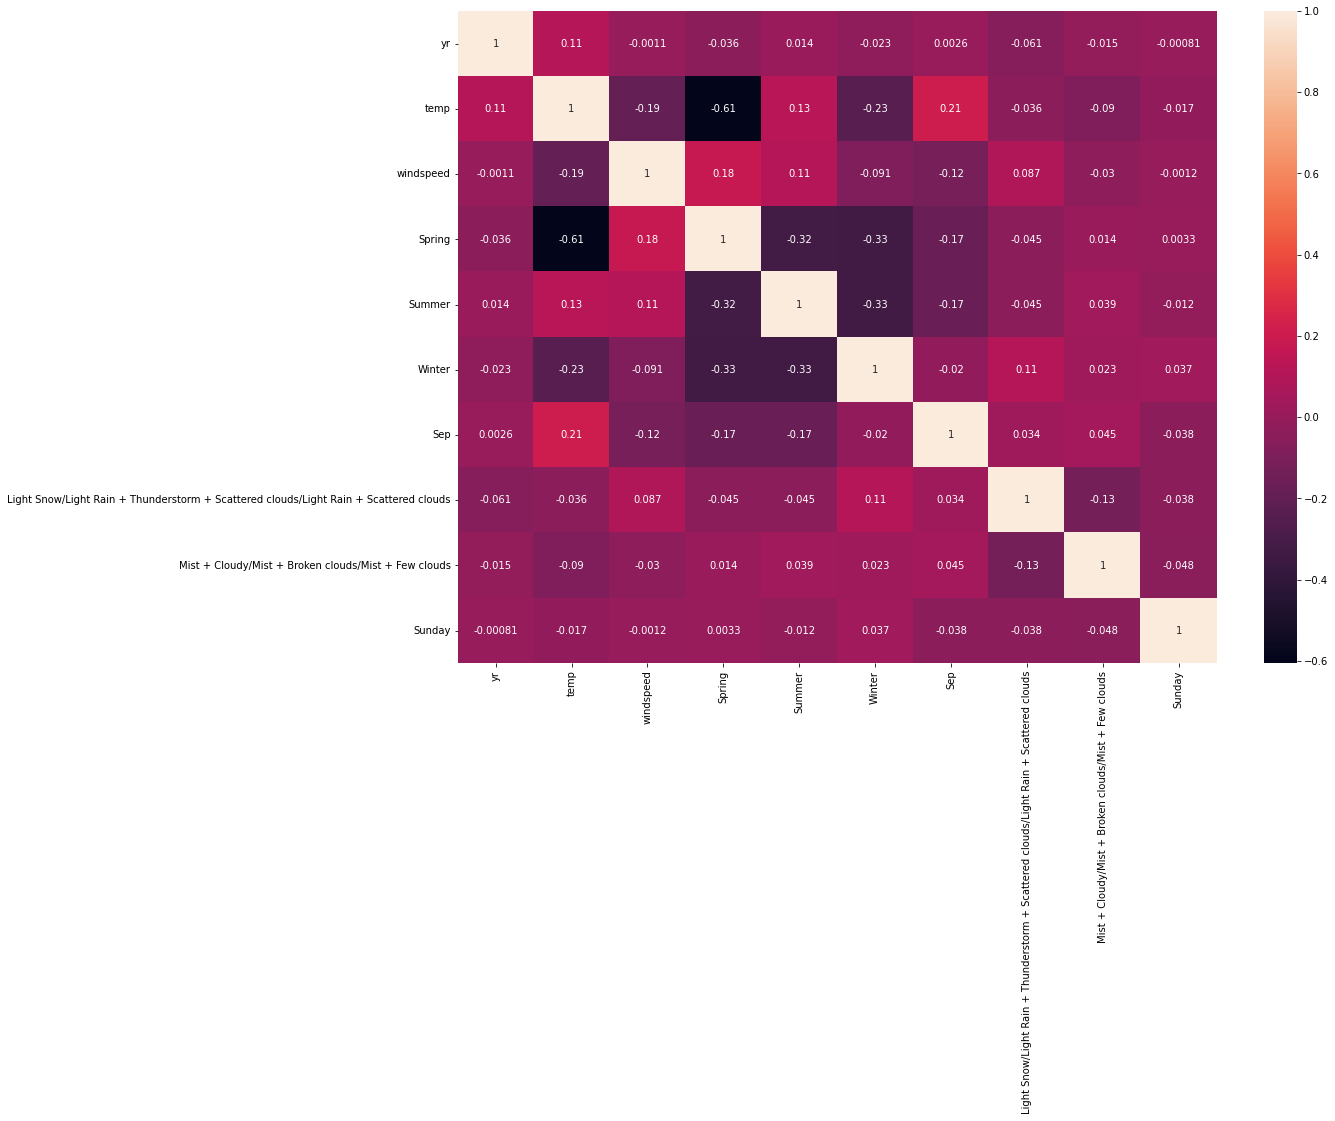

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(X_train_new5.corr(),annot=True)
plt.show()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,Spring,2.00
4,Summer,1.90
5,Winter,1.64
8,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,1.54
6,Sep,1.22
9,Sunday,1.17
7,Light Snow/Light Rain + Thunderstorm + Scatter...,1.08


**Observation**

*  All the features have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the features.




# Residual Analysis and Predictions on Training Dataset Using Final Model

In [ ]:
y_train_pred=lr8.predict(X_train_new_sm)
y_train_pred.head()

653    0.724798
576    0.781601
426    0.466842
728    0.345104
482    0.572684
dtype: float64

In [ ]:
res= y_train - y_train_pred
res.head()

653    0.139444
576    0.046056
426   -0.001587
728   -0.141008
482   -0.089711
dtype: float64

# Error Distribution

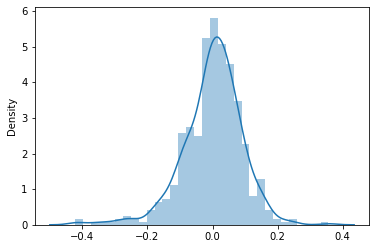

In [ ]:
sns.distplot(res)
plt.show()

**Observation**

* The residuals terms are normally distributed and have a mean value of zero


#  Homoscedasticity

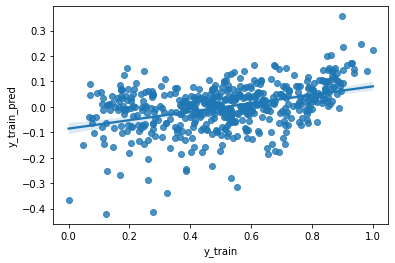

In [ ]:
sns.regplot(y_train,res)             
plt.xlabel('y_train')                       
plt.ylabel('y_train_pred')  

plt.show()

**Observation**


*  Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can see that there is not any pattern in the error terms

# Predictions

# Rescaling the Features for Test Data

In [ ]:
num_var=['cnt','hum','windspeed','temp','atemp']

test[num_var]=scaler.transform(test[num_var])


In [ ]:
test[num_var].describe()

,cnt,hum,windspeed,temp,atemp
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.520592,0.638508,0.313350,0.558941,0.532991
std,0.218435,0.148974,0.159947,0.233698,0.217888
min,0.048205,0.261915,-0.042808,0.046591,0.025950
25%,0.377531,0.527265,0.198517,0.354650,0.344751
50%,0.524275,0.627737,0.299459,0.558691,0.549198
75%,0.672745,0.743928,0.403048,0.759096,0.714132
max,0.963300,1.002146,0.807474,0.984424,0.980934


In [ ]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Dividing the Test dataset into independent variable and tergat variable 

In [ ]:
y_test = test.pop('cnt')
X_test = test


In [ ]:
print(X_test.shape,y_test.shape)

(219, 29) (219,)


In [ ]:
col=X_train_new5.columns
X_test_final=X_test[col]
X_test_final.head()

,yr,temp,windspeed,Spring,Summer,Winter,Sep,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds,Sunday
184,0,0.831783,0.084219,0,0,0,0,0,1,0
535,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0


In [ ]:
Final_lr=LinearRegression()
Final_lr.fit(X_train_new5,y_train)
y_train_pred_final=Final_lr.predict(X_train_new5)
y_test_pred_final=Final_lr.predict(X_test_final)



# R-squared and Adjusted R-squared

In [ ]:
r_sq_train=r2_score(y_train, y_train_pred_final)
r_sq_test=r2_score(y_test, y_test_pred_final)
print('R-squared for Train',round(r_sq_train,3))
print('R-squared for Test',round(r_sq_test,3))

R-squared for Train 0.834
R-squared for Test 0.803


In [ ]:
n_tr = X_train_new5.shape[0]

p_tr = X_train_new5.shape[1]

n_ts = X_test_final.shape[0]

p_ts = X_test_final.shape[1]

adjusted_r_sq_tr = 1-(1-r_sq_train)*(n_tr-1)/(n_tr-p_tr-1)
adjusted_r_sq_ts = 1-(1-r_sq_test)*(n_ts-1)/(n_ts-p_ts-1)
print('Adjusted R-squared for Train',round(adjusted_r_sq_tr,3))
print('Adjusted R-squared for Test',round(adjusted_r_sq_ts,3))

Adjusted R-squared for Train 0.83
Adjusted R-squared for Test 0.793


# Root Mean Squared Error for Train Data and Test Data

In [ ]:
rmse_tr = mean_squared_error(y_train, y_train_pred_final, squared=False)
rmse_ts = mean_squared_error(y_test, y_test_pred_final, squared=False)

print('RMSE for Train',round(rmse_tr,3))
print('RMSE for Test',round(rmse_ts,3))

RMSE for Train 0.091
RMSE for Test 0.097


# y_test vs y_test_pred_final 

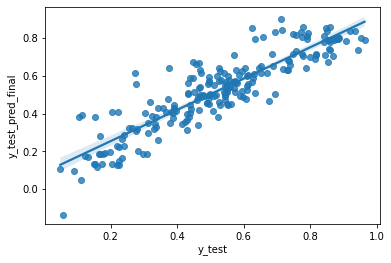

In [ ]:
sns.regplot(y_test, y_test_pred_final)
plt.xlabel('y_test')                         
plt.ylabel('y_test_pred_final')  
plt.show()

**Train & Test R2 Statsitics Comparison**

*  R-squared for Train 0.834

*   R-squared for Test 0.803

*   Adjusted R-squared for Train 0.83
*   Adjusted R-squared for Test 0.793





Top 3 most important features based on which we can plan to achieve maximum bike rental booking are:

•	temp : A coefficient value of 0.479893 indicate that a temperature has    significant impact on bike rentals

•	yr : A coefficient value of 0.234324 indicate that count of bike sharing increased over the year which shows good progress in business.

•	Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain +   Scattered clouds : A coefficient value of -0.286518 indicate that Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds deters people from renting out bikes


**Recommendation:**

As We can see from the above analysis the high temperature and good weather positively impacted on bike rentals so it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.